# **Aprendizaje supervisado**
# SL16. Tarea Final

A continuación se entregan una serie de datasets. Para cada uno de ellos construya uno o varios modelos de aprendizaje supervisado.

## <font color='blue'>**Set de Datos Boston Housing**</font>

El objetivo es poder predecir a nivel de negocio, el valor promedio de una propiedad en miles de dólares (US$1000) en la ciudad de Boston y que corresponde a la variable **MEDV**.

Informacion de los atributos   
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per \$10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    \% lower status of the population
14. MEDV     Median value of owner-occupied homes in \$1000's (target)

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

%matplotlib inline

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Lee un archivo CSV directamente de una URL y guarda los resultados
url='https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
names=['CRIM','ZN','INDUS','CHAS','NOS','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df = pd.read_csv(url,delimiter='\s+', header=None, names=names)
#data = pd.read_csv(url,delim_whitespace=True, header = None)

# Muestra las 5 primeras filas
df.head()

,CRIM,ZN,INDUS,CHAS,NOS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [186]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


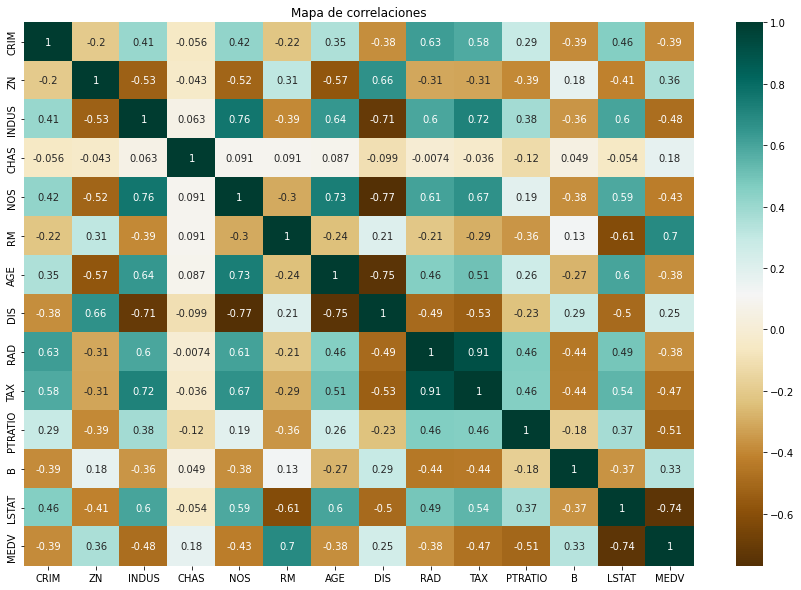

In [60]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap="BrBG", annot=True)
plt.title("Mapa de correlaciones")
plt.show()


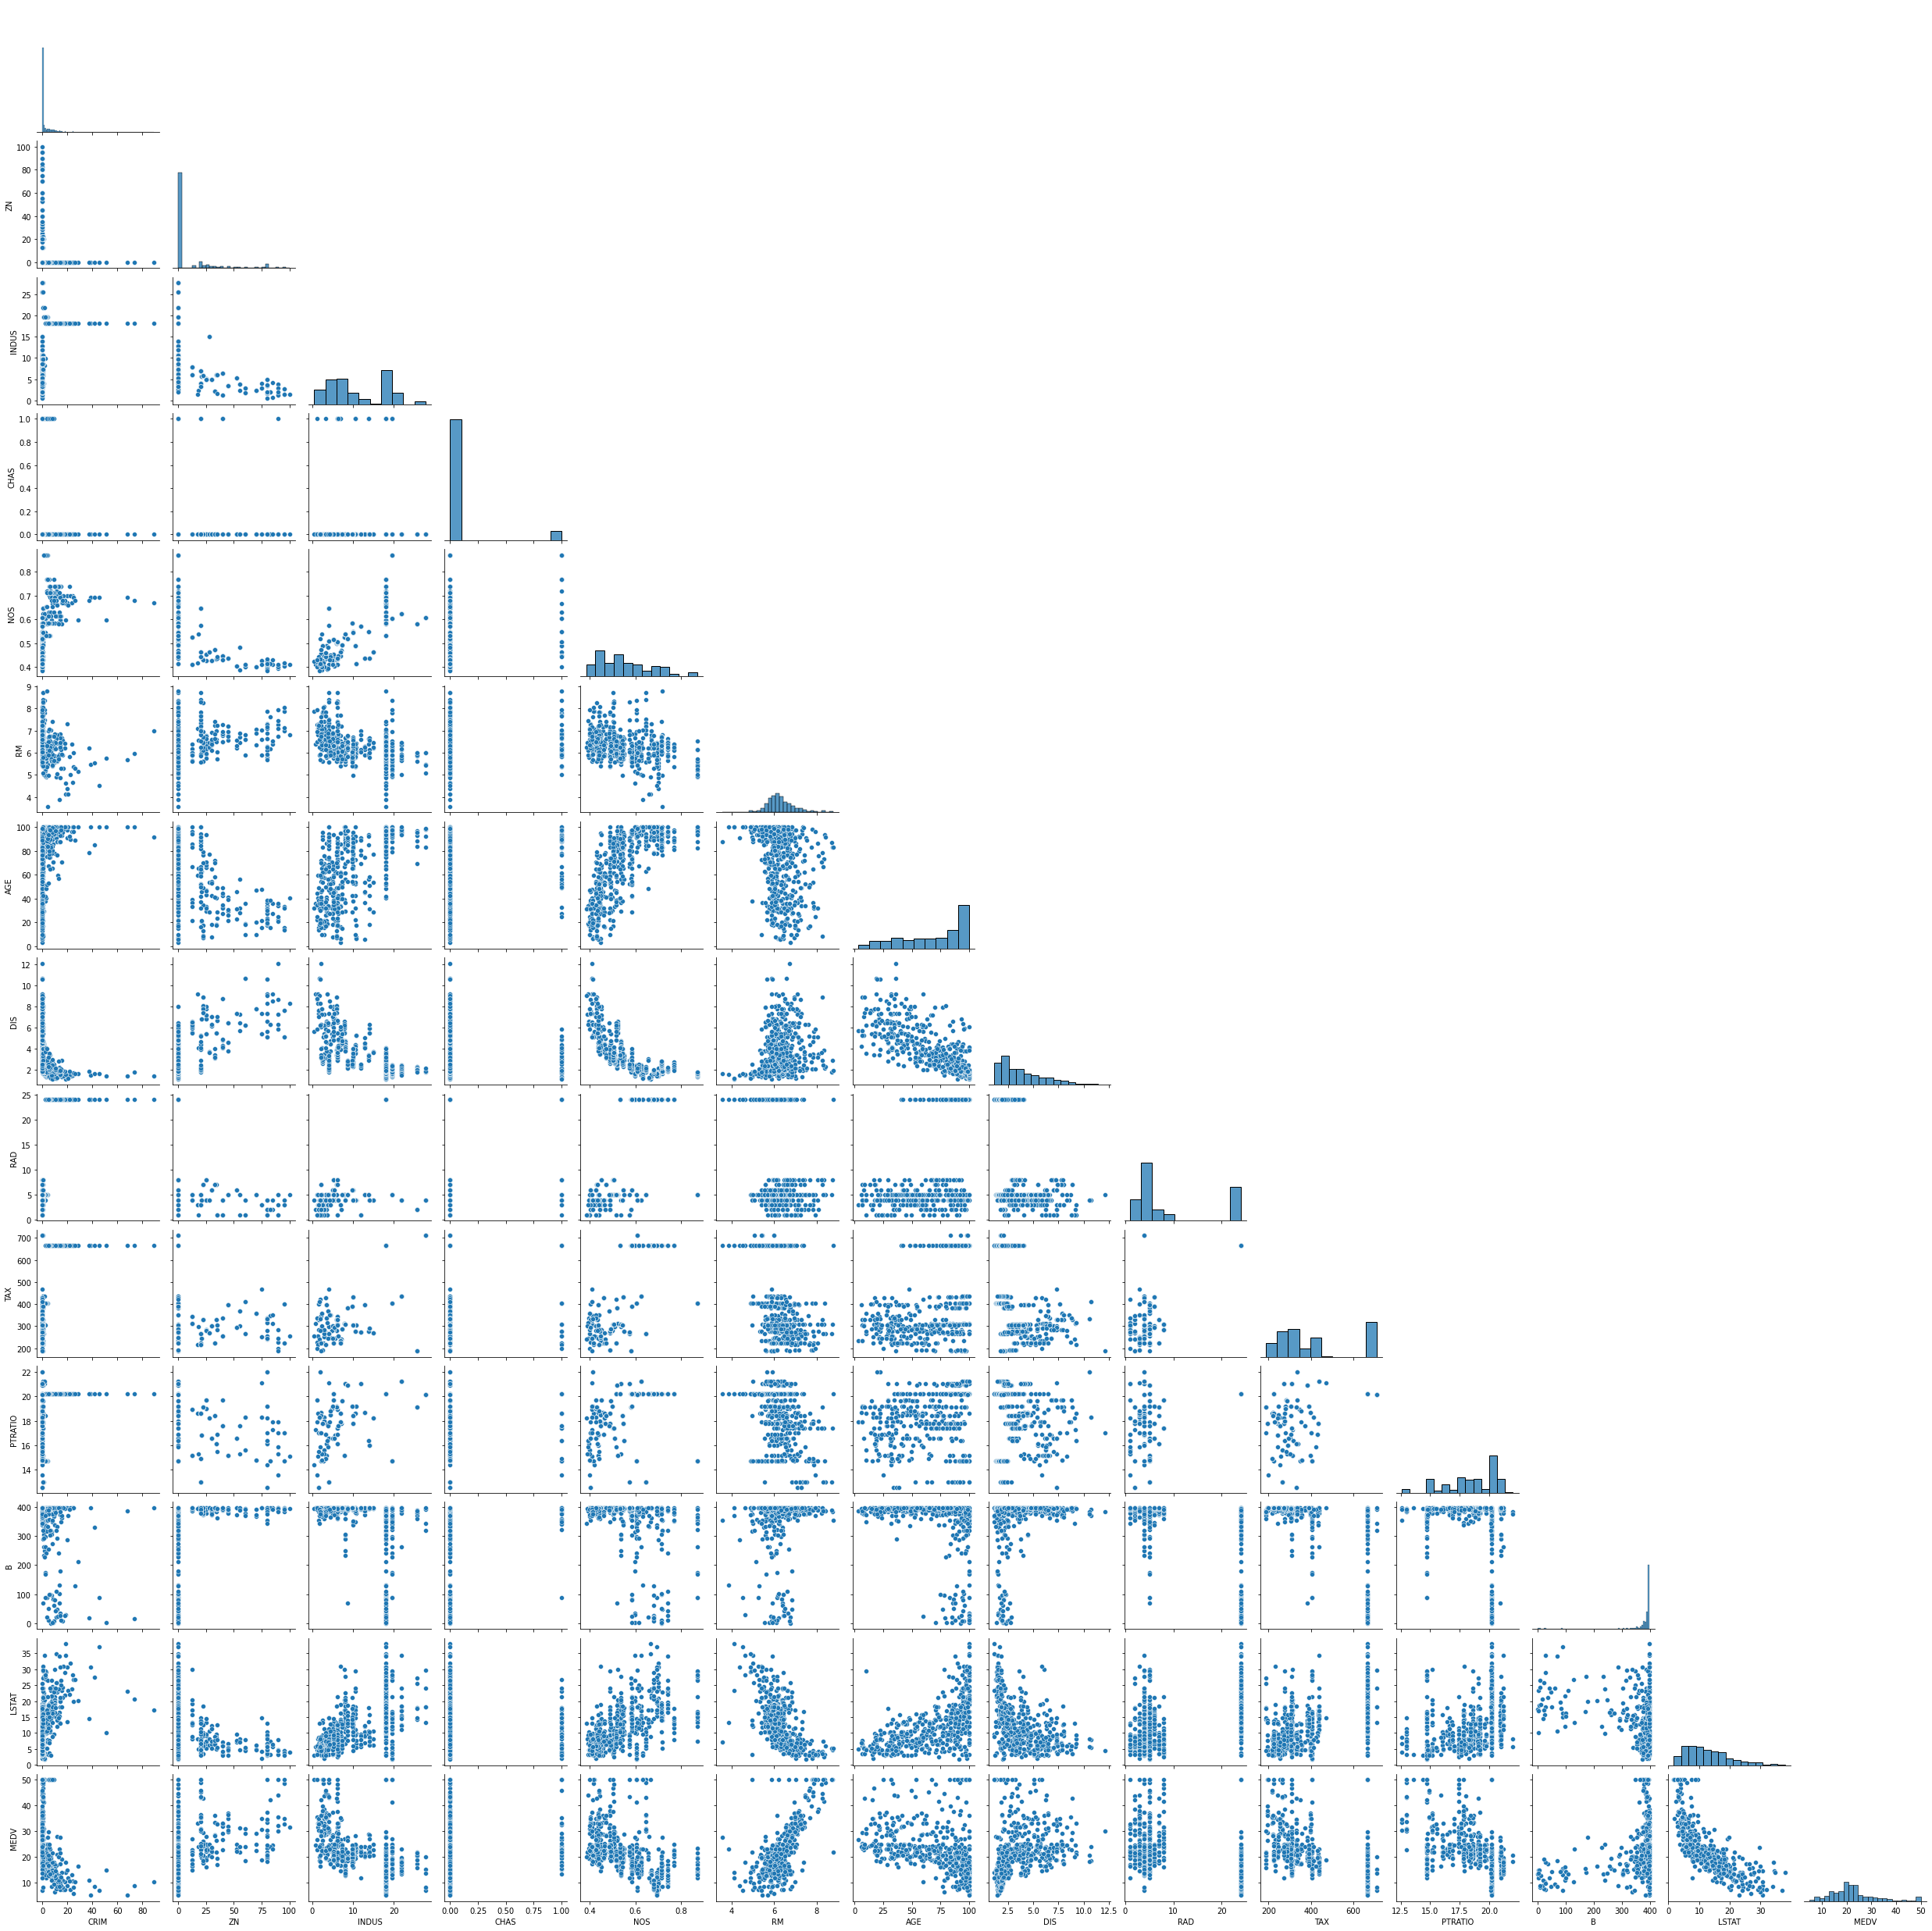

In [127]:
sns.pairplot(data=df, corner=True)
plt.show()

In [122]:
#modelo de regresión lineal
def fn_regresion_lineal(df, X_column, y_column):

  X = df[X_column].values.reshape(df.shape[0],1) 
  y = df[y_column].values.reshape(df.shape[0],1)  

  # tamaño muestra test
  n_size = 0.2 
  
  # Dividir datos y salidas en conjuntos de training/testing
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=n_size, random_state=0)

  # Crear la Regresión Lineal
  regr = linear_model.LinearRegression()

  # Entrenar el modelo usando los datos de entrenamiento (training)
  regr.fit(X_train, y_train)

  # Predecir usando el conjunto de test
  y_pred = regr.predict(X_test)

  # Tamaño muestra test
  print(f'test size: {n_size:.2f}')

  # Coeficientes
  print(f'Pendiente: {regr.coef_[0][0]:.4f} , Intercepto: {regr.intercept_[0]:.4f}')

  # Error Cuadrático Medio
  print(f'Mean squared error (MSE): {mean_squared_error(y_test, y_pred):.2f}')

  # Score de Varianza: 1 es predicción perfecta
  print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

  # Gráfico de salidas
  plt.scatter(X_train, y_train,  color='green')
  plt.scatter(X_test, y_test,  color='black')
  plt.plot(X_test, y_pred, color='blue', linewidth=3)

  plt.title("Regresión Lineal - " + X_column + " vs " + y_column)
  plt.xlabel(X_column)
  plt.ylabel(y_column)

  plt.show()

1. Realice 3 visualizaciones con los datos.

test size: 0.20
Pendiente: 1.2478 , Intercepto: 17.9073
Mean squared error (MSE): 82.62
Variance score: -0.01


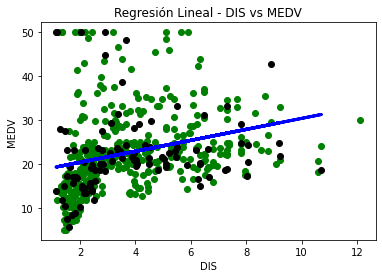

In [123]:
# DIS weighted distances to five Boston employment centres
# MEDV Median value of owner-occupied homes in $1000's (target)
fn_regresion_lineal(df, X_column = 'DIS', y_column = 'MEDV')

test size: 0.20
Pendiente: 9.3764 , Intercepto: -36.4762
Mean squared error (MSE): 46.91
Variance score: 0.42


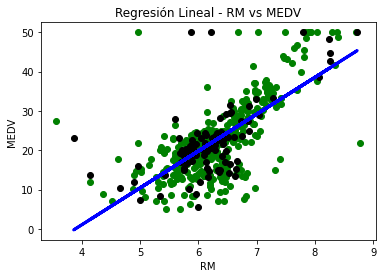

In [124]:
# RM average number of rooms per dwelling
# MEDV Median value of owner-occupied homes in $1000's (target)
fn_regresion_lineal(df, X_column = 'RM', y_column = 'MEDV')

test size: 0.20
Pendiente: -0.9565 , Intercepto: 34.7652
Mean squared error (MSE): 46.34
Variance score: 0.43


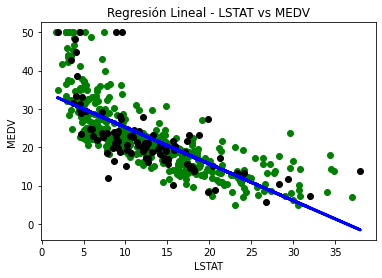

In [125]:
# LSTAT % lower status of the population
# MEDV Median value of owner-occupied homes in $1000's (target)
fn_regresion_lineal(df, X_column = 'LSTAT', y_column = 'MEDV')

2. Pruebe todos los modelos disponibles para el problema de regresión. Reporte el F1 de 20 corridas experimentales con 5 fold cross validation.

In [182]:
# Regresión Logística
def plot_decision_boundary(X, y, regression):
    # Gráfico de los límites de decisión. Para eso, asignaremos un color a cada
    # punto en la malla [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # tamaño de paso en la malla
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = regression.predict(np.c_[xx.ravel(), yy.ravel()])

    # Poner el resultado en un gráfico de color
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plotear los puntos de entrenamiento
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('LSTAT')
    plt.ylabel('RM')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    #plt.xticks(())
    #plt.yticks(())

    plt.show()

In [189]:
df

,CRIM,ZN,INDUS,CHAS,NOS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [194]:

# convertir a variable dependiente en categorica
df['MEDV_cat'] = 0
for idx, item in enumerate(df['MEDV']):
        if item <22.5:
            df['MEDV_cat'][idx] = 0
        if item >=22.5 and item < 40:
            df['MEDV_cat'][idx] = 1
        if item >=40:
            df['MEDV_cat'][idx] = 2

X = df[['LSTAT', 'RM']].values
y = df['MEDV_cat'].values


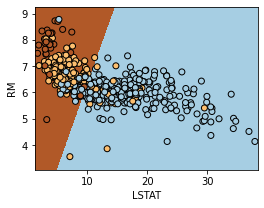

In [196]:
# crear una instancia de clasificador de regresión logística
logreg = LogisticRegression(C=1e+3, solver='newton-cg', max_iter=2) 
logreg.fit(X, y)

plot_decision_boundary(X, y, logreg)

Coeficientes
[ 0.00000000e+00 -1.34743451e+01  1.48845871e+00 -7.52390945e-02
  9.62720288e-04  5.19335303e-05 -1.95098219e-06  1.90973211e-08]


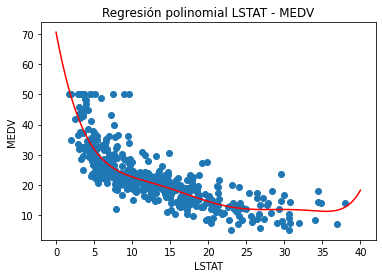

In [52]:
# Funciones de base polinomial
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())
# ['CRIM','ZN','INDUS','CHAS','NOS','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
x = df['LSTAT'].values
y = df['MEDV'].values

# entrenar el modelo 
poly_model.fit(x[:, np.newaxis], y) 

# predictor
xfit = np.linspace(0, 40, 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])

# Graficar valores
print('Coeficientes')
print(poly_model.steps[1][1].coef_)  

plt.scatter(x, y)
plt.plot(xfit, yfit, 'r');
plt.title("Regresión polinomial LSTAT - MEDV")
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

In [49]:
# Funciones base gaussianas
from sklearn.base import BaseEstimator, TransformerMixin

# Clase que hereda de BaseEstimator, TransformerMixin
class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    # Metodo constructor de la clase, con parametros N y width_factor
    # da valores inciales al objeto cuando este es creado
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    # Los metodos son los procesos o acciones que puede realizar el objeto
    # Los metodos estaticos no pasan como parametros en nombre de la clase ni del objeto
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width                                  #Calcula el punto medio entre x e y
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)



Coeficientes
[  -50079.83877073   163161.49520419  -347482.28054909   563757.05697892
  -791055.40308968   986857.17594747 -1141240.46671793  1226168.48123635
 -1245306.0521442   1183683.01318465 -1059150.52683603   872326.32653659
  -656515.22024773   425070.8506836   -218713.18572945    50566.07057228
    48552.70569818   -86800.74251222    65831.99867146   -29911.36359934]


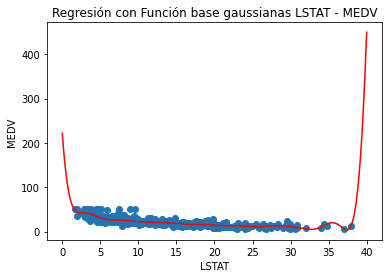

In [54]:
# crea una lista de acciones utilizando 20 gausianas    
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())

# ['CRIM','ZN','INDUS','CHAS','NOS','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
x = df['LSTAT'].values
y = df['MEDV'].values

# entrenar el modelo 
gauss_model.fit(x[:, np.newaxis], y)

# predictor
xfit = np.linspace(0, 40, 1000)
yfit = gauss_model.predict(xfit[:, np.newaxis])

# Graficar valores
print('Coeficientes')
print(gauss_model.steps[1][1].coef_)  

plt.scatter(x, y)
plt.plot(xfit, yfit, 'r')
plt.title("Regresión con Función base gaussianas LSTAT - MEDV")
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

## <font color='blue'>**Set de Datos Fake News**</font>

Inspiración
¿Se puede usar este dataset para generar un algoritmo que identifique "fake news" y "real news"?

https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

**Referencias** 

*   Ahmed H, Traore I, Saad S. “Detecting opinion spams and fake news using text classification”, Journal of Security and Privacy, Volume 1, Issue 1, Wiley, January/February 2018.
*   Ahmed H, Traore I, Saad S. (2017) “Detection of Online Fake News Using N-Gram Analysis and Machine Learning Techniques. In: Traore I., Woungang I., Awad A. (eds) Intelligent, Secure, and Dependable Systems in Distributed and Cloud Environments. ISDDC 2017. Lecture Notes in Computer Science, vol 10618. Springer, Cham (pp. 127-138).






Revise los datos que se encuentran en el archivo **Dataset_fakenews.zip**. Realice un analisis descriptivo de los datos, genere las transformaciones necesarias para preparar su dataset para algoritmos de clasificacion y pruebe con todos los modelos de clasificacion revisados en clases. Optimice los parametros de su algoritmo y reporte el F1 de 20 corridas experimentales con 5 fold cross validation. 

Explique sus decisiones, genere visualizaciones y conclusiones.

In [ ]:
# Solución

## <font color='blue'>**Set de Datos Tarjetas de Créditos**</font>

Utilizaremos un conjunto de datos real de transacciones anónimas con tarjetas de crédito realizadas por titulares de tarjetas europeos a partir de septiembre de 2013. Estas transacciones están etiquetadas como fraudulentas o genuinas, y el objetivo es crear una solución de detección de fraudes utilizando el aprendizaje automático para predecir las etiquetas correctas para nuevas instancias.
Este conjunto de datos está muy desequilibrado. De las 284.807 transacciones, solo 492 son fraudulentas (0,172%). Este bajo porcentaje de fraude es bastante típico de las transacciones con tarjeta de crédito. Hay 28 variables, todas ellas numéricas, y no hay variables categóricas. Estas variables no son las características originales, sino el resultado de un análisis de componentes principales.

Para lidiar con datasets desbalanceados se recomienda utilizar la libreria imblearn. En ella hay varios metodos para balancear los datos. Existe un método de submuestreo y otro de sobremuestreo (SMOTE). 

In [ ]:
import imblearn

Funciones para Over y Subsampling.

In [ ]:
#oversample = SMOTE()
#under = RandomUnderSampler(sampling_strategy=0.5)
#X, y = oversample.fit_resample(X, y)

Pipeline en donde se hacen los 2 métodos a la vez. 

In [ ]:
# define pipeline
#over = SMOTE(sampling_strategy=0.1)
#under = RandomUnderSampler(sampling_strategy=0.5)
#steps = [('o', over), ('u', under)]
#pipeline = Pipeline(steps=steps)
# transform the dataset
#X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
#counter = Counter(y)
#print(counter)